In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
import os.path as path
import wget

In [70]:
!rm Data/*
file = 'EnergiaPotencialGas2D.txt'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EnergiaPotencialGas2D.txt'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('Descargado')
else:
    Path_ = file

rm: Data/*: No such file or directory


In [71]:
data=np.loadtxt(Path_)
energia= data[:,1]
time=data[:,0]

In [72]:
mean=np.mean(energia)
manchas= energia-mean

Text(0, 0.5, 'E[J]')

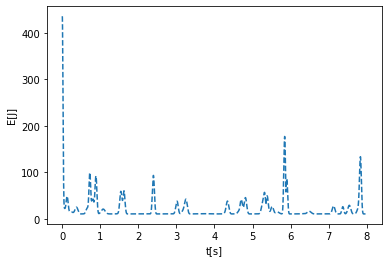

In [73]:
plt.plot(time, energia+mean, "--")
plt.xlabel("t[s]")
plt.ylabel("E[J]")

In [79]:
#Transformada de Fourier 
fft=np.fft.fft(energia)
N=len(energia)
freq=np.fft.fftfreq(N,1)
ffta=np.abs(fft)
max_=np.argmax(ffta)
f=freq[max_]

<StemContainer object of 3 artists>

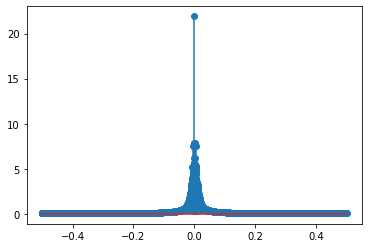

In [80]:
plt.stem(freq, 2.*ffta/N, use_line_collection="True")

In [81]:
#Mask
mask= freq <= 0.
fft2=fft.copy()
fft2[mask]=0.
ffta2=np.abs(fft2)
max_=np.argmax(ffta2)
f=freq[max_]
print(f)

0.00125


<StemContainer object of 3 artists>

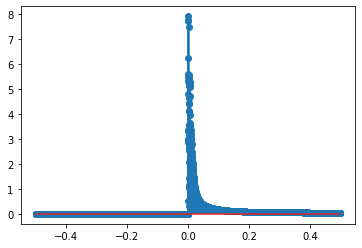

In [82]:
plt.stem(freq, 2.*ffta2/N, use_line_collection="True")

In [83]:
mayor=np.abs(freq) > f
menor= np.abs(freq) < f

In [84]:
fft[mayor | menor]=0
ffta= np.abs(fft)

<StemContainer object of 3 artists>

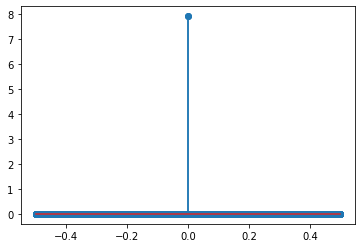

In [85]:
plt.stem(freq,2*ffta/N, use_line_collection="True")

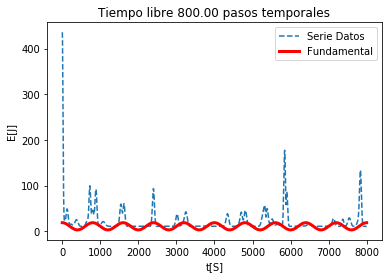

In [89]:
#Transformada inversa
inversa= np.fft.ifft(fft)
plt.plot(time*1000, energia+mean,"--", label="Serie Datos")
plt.plot(time*1000, np.real(inversa)+mean, c="r",linewidth=3, label= "Fundamental")
plt.title("Tiempo libre 800.00 pasos temporales")
plt.xlabel("t[S]")
plt.ylabel("E[J]")
plt.legend()
plt.savefig("tiempolibre.png")